**Importing the Dependencies**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

**Loading the MNIST data from keras.dataset**

In [2]:
(X_train, Y_train),(X_test, Y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
type(X_train)

numpy.ndarray

In [4]:
# SHape of the numpy arrays
print(X_train.shape, Y_train.shape,X_test.shape,Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


1st value is the number of data and 2nd and 3rd values are the dimensions of each image

TRaining Data = 60000 images

Test Data = 10000 images

Image dimensions: 28 x 28

Grayscale IMage: 1 channel

In [5]:
# Printing the 10th image
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [6]:
print(X_train[10].shape)

(28, 28)


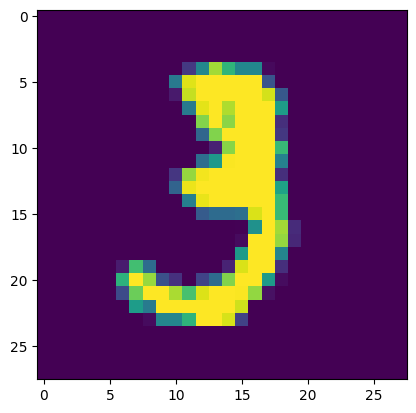

3


In [7]:
# displaying the image

plt.imshow(X_train[10])
plt.show()

# Print the corresponding label
print(Y_train[10])

Image Lables

In [8]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [9]:
# Unique value in Y_train
print(np.unique(Y_train))

# Unique value in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use this label as such or we can also apply One-Hot ENcoding

ALl the images have same dimensions in this dataet, If not, We have to resize all the images to common dimension

In [11]:
#  Normalization: Scaling the values

X_train = X_train/255
X_test = X_test/255

In [14]:
print(X_train[50])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

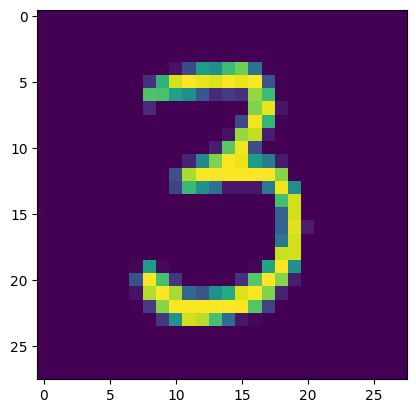

3


In [15]:
plt.imshow(X_train[50])
plt.show()

print(Y_train[50])

**Building the Neural Network**

In [16]:
# Setting up the layers of the Neural Network

model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(50, activation = 'relu'),
    keras.layers.Dense(50, activation = 'relu'),
    keras.layers.Dense(10,activation ='sigmoid')
])

In [17]:
# Compiling the neural Network

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [18]:
# Training the neural network

model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 0.3024 - accuracy: 0.9129
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1406 - accuracy: 0.9585
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1027 - accuracy: 0.9690
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0822 - accuracy: 0.9749
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0681 - accuracy: 0.9789
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0582 - accuracy: 0.9819
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0511 - accuracy: 0.9836
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0439 - accuracy: 0.9864
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0385 - accuracy: 0.9876
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.034

Training data accuracy = 98.8%

Accuracy on Test Data

In [19]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0940 - accuracy: 0.9749
0.9749000072479248


Test Data Accuracy = 97.4%

In [20]:
print(X_test.shape)

(10000, 28, 28)


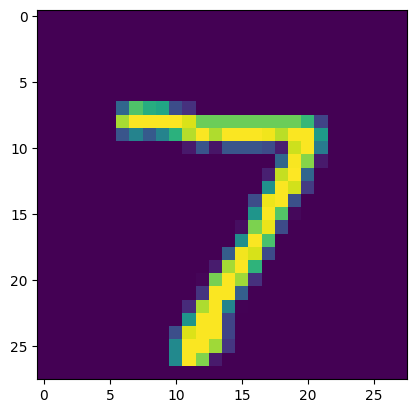

In [21]:
# First data point in X_test
plt.imshow(X_test[0])
plt.show()

In [22]:
print(Y_test[0])

7


In [25]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [26]:
Y_pred.shape

(10000, 10)

In [27]:
Y_pred[0]

array([2.01733383e-05, 1.64839497e-03, 1.43240448e-02, 9.72707272e-01,
       1.00931175e-06, 2.04726383e-02, 5.17163645e-10, 9.99999464e-01,
       1.22414224e-01, 6.67032838e-01], dtype=float32)

Y_pred contains 10 columns which are the number of classes(10 in this case) and each value represent the probability of value being in that particular class

In [28]:
# Converting the prediction probability to class label

label_for_first_image = np.argmax(Y_pred[0])
label_for_first_image

7

In [29]:
# Converting the prediction probsbility of Y_pred to class label for all the data points

Y_pred_labels = [np.argmax(i) for i in Y_pred]
Y_pred_labels

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 6,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 8,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 4,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 3,
 7,
 4,
 6,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 5,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 9,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 2,
 9,
 9,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 9,
 0,
 8,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 5,
 9,
 3,
 9,
 0,
 3,
 6,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 8,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 9,
 8,
 7,
 2,
 3,
 0,
 2,
 4,
 2,


Y_test:       True Labels

Y_pred_label: Predicted Labels


**Confusion Matrix**

In [30]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)
conf_mat

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 957,    0,    0,    1,    1,    6,    9,    1,    3,    2],
       [   0, 1123,    3,    1,    0,    1,    2,    1,    4,    0],
       [   3,    2, 1002,    6,    2,    0,    3,    5,    9,    0],
       [   0,    0,    6,  967,    0,    8,    1,   11,   10,    7],
       [   0,    0,    5,    1,  961,    3,    2,    4,    0,    6],
       [   1,    0,    0,    4,    2,  872,    6,    0,    4,    3],
       [   3,    2,    2,    0,    5,    4,  939,    0,    3,    0],
       [   0,    1,    6,    0,    1,    0,    0, 1013,    3,    4],
       [   2,    1,    1,    4,    4,    9,    0,    6,  944,    3],
       [   1,    2,    0,    6,   15,    4,    1,    7,    2,  971]],
      dtype=int32)>

Text(0.5, 47.7222222222222, 'Predicted Labels')

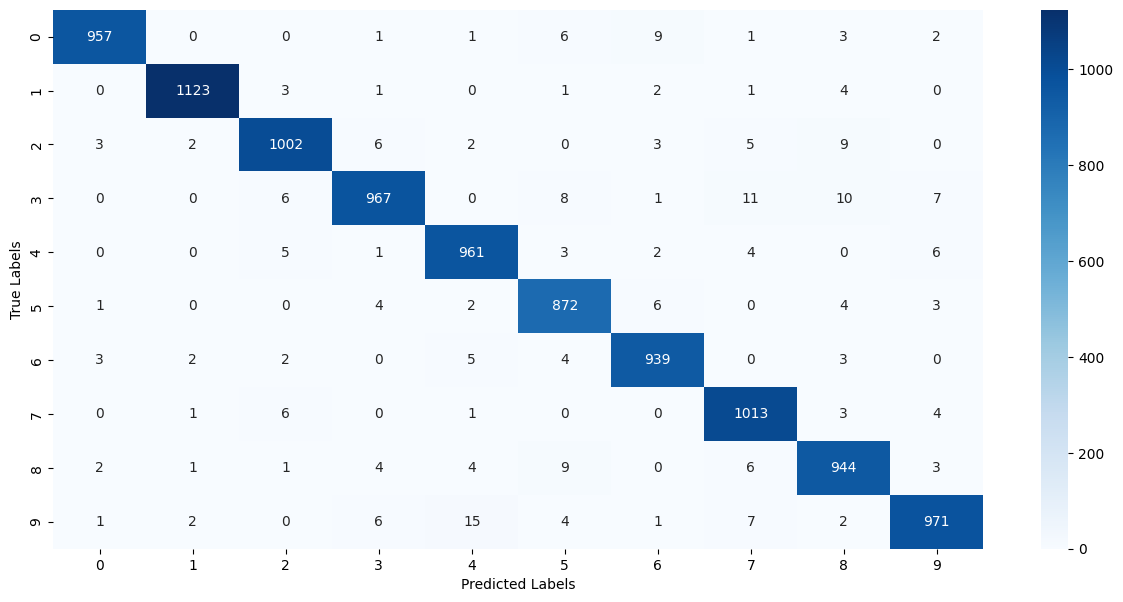

In [31]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot= True, fmt='d', cmap = 'Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

**Build a predictive System**

In [32]:
input_image = '/content/MNIST_digit.png'

input_img = cv2.imread(input_image)

In [33]:
type(input_img)

numpy.ndarray

In [34]:
input_img

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [35]:
input_img.shape

(318, 318, 3)

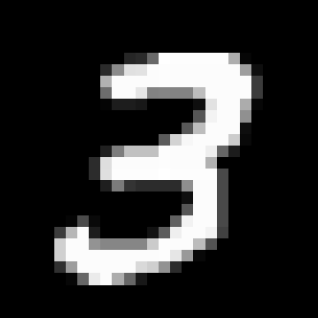

In [36]:
cv2_imshow(input_img)

In [40]:
grayscale_img = cv2.cvtColor(input_img, cv2.COLOR_RGB2GRAY)

In [41]:
grayscale_img.shape

(318, 318)

In [42]:
input_img_resize = cv2.resize(grayscale_img, (28,28))

In [43]:
input_img_resize.shape

(28, 28)

In [44]:
cv2_imshow(input_img_resize)

In [45]:
input_img_resize

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  38,  43,
        105, 255, 253, 253, 253, 253, 253, 174,   6,   0,   0,   0,   0,
          0,   0],
       [  

In [46]:
# Normalize the values
input_img_scale = input_img_resize/255
input_img_scale

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [48]:
input_image_reshape = np.reshape(input_img_resize, [1, 28, 28])
input_image_reshape.shape

(1, 28, 28)

In [49]:
input_predict = model.predict(input_image_reshape)
input_predict

1/1 [==============================] - 0s 96ms/step


array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [50]:
input_pred_label = np.argmax(input_predict)
input_pred_label

3

**Predictive System**

Path of the image to be predicted: /content/MNIST_digit.png


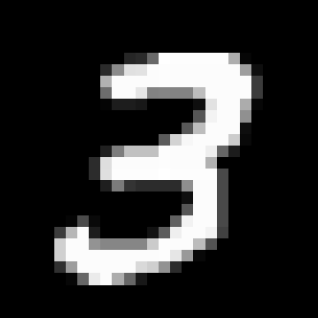

1/1 [==============================] - 0s 35ms/step
The image is recognised as:  3


In [54]:
input_image = input('Path of the image to be predicted: ')

input_img = cv2.imread(input_image)

cv2_imshow(input_img)

# Convert the RGB image to grayscale
grayscale_img = cv2.cvtColor(input_img, cv2.COLOR_RGB2GRAY)

# Reduce the size of the image
input_img_resize = cv2.resize(grayscale_img, (28,28))

# Normalize the values
input_img_scale = input_img_resize/255

# Resize the numpy image data by increasing 1 dimension
input_image_reshape = np.reshape(input_img_resize, [1, 28, 28])

# Predict the input using the build model
input_predict = model.predict(input_image_reshape)

# Take the larget probability from the input predict which will be our outcome
input_pred_label = np.argmax(input_predict)

print("The image is recognised as: ", input_pred_label)